## Importing Depedencies

In [2]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

### Labelling the training data

In [80]:
data = []
labels = []
classes= 43
cur_path = os.getcwd()
for i in range (classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)
    num=0
    for a in images:
        if num<500:     #We have taken 500 sample from each set ,just to speed up the process
            try:        #You can take any number of sample

                
                image=Image.open(path + '\\'+ a)
                image =image.resize((30,30))
                image = np.array(image)
                data.append(image)
                labels.append(i)
                num+=1

            except:
                print("Error loading image")

data = np.array(data)
labels = np.array(labels)

In [81]:
print(data.shape, labels.shape)

(17970, 30, 30, 3) (17970,)


In [82]:
#Splitting training and testing dataset


X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14376, 30, 30, 3) (3594, 30, 30, 3) (14376,) (3594,)


In [83]:
#Converting the labels into one hot encoding


y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)


## Building the model

In [84]:

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

## Compilation of the model

In [85]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 12
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/12
450/450 [==============================] - 53s 113ms/step - loss: 3.2542 - accuracy: 0.2021 - val_loss: 1.6906 - val_accuracy: 0.6291
Epoch 2/12
450/450 [==============================] - 49s 110ms/step - loss: 1.5733 - accuracy: 0.5588 - val_loss: 0.7696 - val_accuracy: 0.7863
Epoch 3/12
450/450 [==============================] - 52s 115ms/step - loss: 1.0444 - accuracy: 0.6947 - val_loss: 0.4866 - val_accuracy: 0.8748
Epoch 4/12
450/450 [==============================] - 51s 113ms/step - loss: 0.8152 - accuracy: 0.7558 - val_loss: 0.5822 - val_accuracy: 0.8303
Epoch 5/12
450/450 [==============================] - 51s 114ms/step - loss: 0.5911 - accuracy: 0.8189 - val_loss: 0.2885 - val_accuracy: 0.9171
Epoch 6/12
450/450 [==============================] - 50s 111ms/step - loss: 0.4885 - accuracy: 0.8509 - val_loss: 0.1799 - val_accuracy: 0.9455
Epoch 7/12
450/450 [==============================] - 50s 111ms/step - loss: 0.4321 - accuracy: 0.8676 - val_loss: 0.1751 - val_ac

### Plotting accuracy graphs 

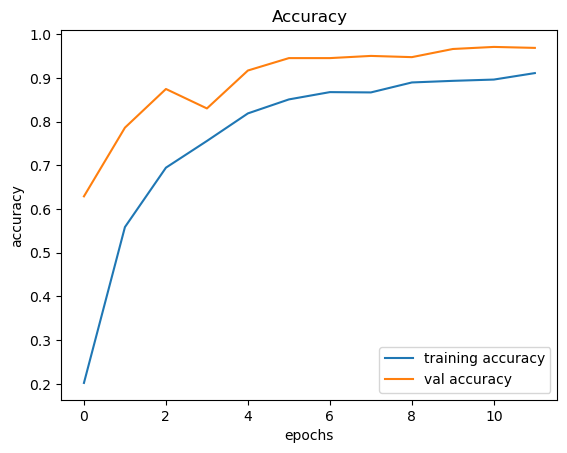

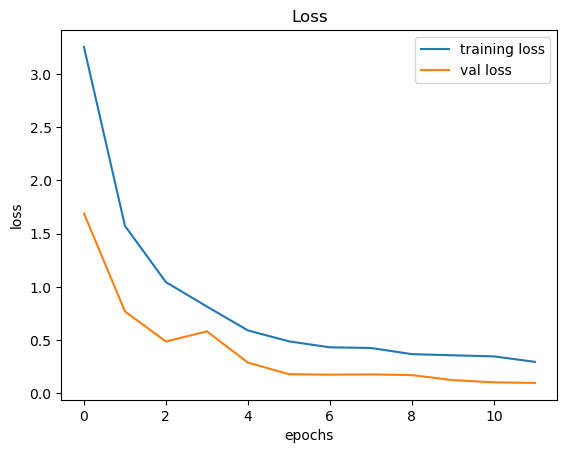

In [86]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#### Testing accuracy on test dataset

In [87]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"][:500].values
imgs = y_test["Path"].values

data=[]
num=0
for img in imgs:
    if num<500:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
        num+=1

X_test=np.array(data)
print(X_test.shape)

pred = model.predict(X_test)
classes=np.argmax(pred,axis=1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, classes))



(210, 30, 30, 3)
7/7 [==============================] - 0s 30ms/step
0.861904761904762


# Making GUI

In [111]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy as np
#load the trained model to classify sign
from keras.models import load_model
model = load_model('my_model.h5')
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }
#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#74998d')
label=Label(top,background='#74998d', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = np.array(image)
    
    
    predict1 = model.predict(tf.expand_dims(image,axis=0))
    predict1_index = tf.argmax(predict1, axis=1).numpy()[0]
    
    sign = classes[predict1_index+1]

    print(sign)
    label.configure(foreground='#ff1f1f', text=sign) 
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#20e8a9', foreground='black',font=('arial',10,'bold'))
    classify_b.place(relx=0.42,rely=0.72)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#20e8a9', foreground='black',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

1/1 [==============================] - 0s 137ms/step
General caution
1/1 [==============================] - 0s 30ms/step
Ahead only
